<a href="https://colab.research.google.com/github/cordeiroraylle/Calculo-Numerico/blob/master/Projeto_de_Interpola%C3%A7%C3%A3o_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Interpolação
Métodos Numéricos - 2019.2

Raylle Cordeiro - 20172610014

**Fonte:** https://www.kaggle.com/taniaj/gender-development-inequality

**Descrição:** De acordo com o Relatório de Desenvolvimento Humano, pelo Programa de Desenvolvimento das Nações Unidas, temos um dataset exibindo a relação de IDH de 188 paises e o indice de Desenvolvimento por Genero.  Esse dataset mede a disparidade do IDH por genero, quanto mais perto de 1 menor é a diferença entre homens e mulheres. Com essa analise, podemos analisar como o paises com posições mais altas no Rank de IDH possuem uma disparidade de genero menor.

Nesse caso, durante alguns anos não foi exibido dados para alguns paises, assim, para essa regressão foi utilizada essa planilha alternativa:
https://github.com/cordeiroraylle/Calculo-Numerico/blob/master/gender_development_index_4.csv


Os dados (amostra) foram coletados em 188 paises do Mundo


**Dados:**

* **HDI_Rank_2015**	- Rank de IDH em 2016

* **Country** - Paises envolvidos no estudo

* **2000**	-  Ano em que os dados de disparidade por genero são exibidos

* **2005**	-  Ano em que os dados de disparidade por genero são exibidos

* **2010**	-  Ano em que os dados de disparidade por genero são exibidos

* **2011**	-  Ano em que os dados de disparidade por genero são exibidos

* **2012**	-  Ano em que os dados de disparidade por genero são exibidos

* **2013**	-  Ano em que os dados de disparidade por genero são exibidos

* **2014**	-  Ano em que os dados de disparidade por genero são exibidos




#Interpolação

 A interpolação o método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos, ou seja, ela nos permite aproximar os valores dos conjuntos discretos.
 

---

 Nesse projeto utilizaremos os métodos de **Newton, Lagrange e Spline.**

# Importando bibliotecas


In [0]:
pip install matplotlib

In [0]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial as P
from numpy import polynomial
import matplotlib.pyplot as plot 
from bisect import bisect



# Importando o dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving gender_development_index_4.csv to gender_development_index_4 (2).csv


In [0]:
dados = pd.read_csv("gender_development_index_4.csv")

#Visualisando dados

In [0]:
dados.head(10)

,HDI_Rank_2015,Country,2000,2005,2010,2011,2012,2013,2014,ano_2015
0,169,Afghanistan,0.282,0.481,0.580,0.594,0.602,0.607,0.609,0.609
1,75,Albania,0.936,0.944,0.959,0.957,0.960,0.960,0.960,0.959
2,83,Algeria,0.788,0.815,0.845,0.845,0.845,0.847,0.849,0.854
3,45,Argentina,0.981,1.001,0.998,0.987,0.989,0.989,0.983,0.982
4,84,Armenia,0.947,0.976,1.002,1.003,1.000,0.998,0.995,0.993
5,2,Australia,0.962,0.969,0.977,0.977,0.979,0.979,0.979,0.978
6,24,Austria,0.933,0.936,0.944,0.947,0.950,0.953,0.955,0.957
7,78,Azerbaijan,0.951,0.922,0.950,0.945,0.941,0.943,0.956,0.940
8,47,Bahrain,0.932,0.956,0.968,0.969,0.970,0.971,0.971,0.970
9,139,Bangladesh,0.835,0.868,0.904,0.916,0.970,0.925,0.926,0.927


In [0]:
dados= np.array([[169, 0.609], [75,0.959], [83, 0.854], [45, 0.982],[84,0.993],[2,0.978],[24,0.957],[78,0.940],[47,0.970],[139,0.927]])
dados


array([[169.   ,   0.609],
       [ 75.   ,   0.959],
       [ 83.   ,   0.854],
       [ 45.   ,   0.982],
       [ 84.   ,   0.993],
       [  2.   ,   0.978],
       [ 24.   ,   0.957],
       [ 78.   ,   0.94 ],
       [ 47.   ,   0.97 ],
       [139.   ,   0.927]])

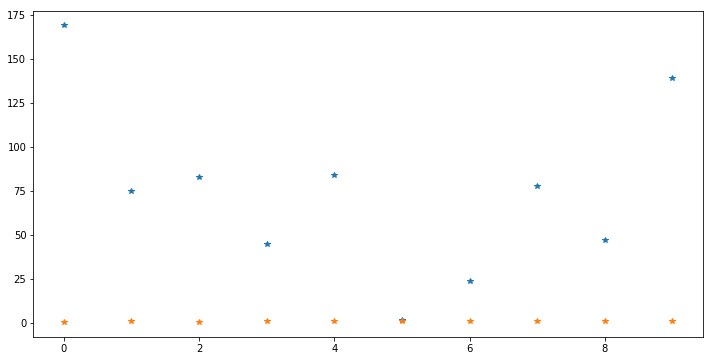

In [0]:
plot.figure(figsize=(12,6))
plot.plot(dados,'*')
plot.show()

# Método de Newton

Há uma grande variedade de formas alternativas para expressar um polinômio interpolador, além do formato mais familiar:

$$ P_n(x) = a_0 + a_1x + a_2x^2 + ... + a_nx^n $$

O polinômio de Newton por diferenças divididas está entre as fórmulas mais populares e úteis. Antes de apresentar a equação geral, será introduzidaa versão de primeiro grau devido à sua interpretação visual mais simples.

Esse método é um polinômio interpolador para um dado conjunto de pontos. Os coeficientes do polinômio são calculados através de diferenças divididas.


Assim, a **fórmula geral** para o método de Newton é dada por:

$$Pn−1=a0+a1(x−x0)+a2(x−x0)(x−x1)+…+an−1(x−x1)(x−x2)…(x−xn−1)$$

##Implementação

In [0]:
l = []
Pn = 0
for i in range(len(dados)):
    l.append(dados[i][1])
tabela = []
tabela.append(l)
for i in range(len(dados) - 1):
    l = [] 
    for j in range(len(dados) - i - 1):
        dif = (tabela[i][j + 1] - tabela[i][j]) / (dados[j + 1 + i][0] - dados[j][0])
        l.append(dif)
    tabela.append(l) 
difdiv = []  
for i in range(len(tabela)):
    difdiv.append(tabela[i][0])

somatorio = 0
for i in range(1, len(dados)):
    produtorio = 1
    for k in range(i): 
        produtorio *= (P([-dados[k][0], 1])) 
    somatorio += difdiv[i] * produtorio
Pn = difdiv[0] + somatorio
funcao = list(Pn)  
texto = ""
for i in range(len(funcao)):
    if funcao[i] == 0:
        continue
    elif i == 0:
        texto += str(funcao[i])
    else:
        texto += " + " + str(funcao[i])
        texto += ("*x^%o" % (i))
print("Pn(x) :")
print(texto)

Pn(x) :
-106.62186318903191 + 68.49065514675725*x^1 + -8.172822671299778*x^2 + 0.43900636253410424*x^3 + -0.013097612480873365*x^4 + 0.00023493408293133342*x^5 + -2.5871664430804308e-06*x^6 + 1.7061283853265903e-08*x^7 + -6.154584225651297e-11*x^10 + 9.294685567009761e-14*x^11


In [0]:
  s = input("Deseja calcular Pn(x) dado um valor de x? \n [S/N]").lower()  
  if s == "s":
      print("Pn(x) em qual ponto?")
      p = float(input())
      print("Pn(%a) é igual a %a" % (p, Pn(p)))

  s = input("Encontrar os valores de x dado um valor de Pn(x)? \n [S/N]")  
  if s == "s":
      print("Valores de x para qual valor de Pn(x)")
      p = float(input())
      print("para Pn(x)=%a temos: " % p, polynomial.polynomial.polyroots(list(Pn - P([p]))),"Obs: Se houver, j = raiz de menos 1")
  
  print("(x,Pn(x))")
  for i in range(len(dados)):
      print("(%a,%a)" % (dados[i][0], round(Pn(dados[i][0]), 4)))

# Método de Lagrange

## Forma Geral do Polinômio de Lagrange

Ambas as versões de primeira e segunda ordem bem como os polinômios de Lagrange de ordem superior podem ser representados concisamente por

$$f_{n-1} = \sum_{i=1}^n L_i(x)f(x_i)$$

sendo

$$L_i(x) = \prod_{j=1\\j \neq i}^n \frac{x-x_j}{x_i-x_j}$$

onde $n$ é o número de pontos dados e $\prod$ indica o "produto de".

## Implementação

In [0]:
  Pn = 0
 
  for k in range(len(dados)):
      numerador = P([1])
      denominador = P([1])
      for j in range(len(dados)):  
          if j == k:  
              continue
          numerador *= P([-dados[j][0], 1])  
          denominador *= dados[k][0] - dados[j][0] 
      Pn = Pn + dados[k][1] * (numerador // denominador)  
  funcao = list(Pn)  
  texto = ""

  for i in range(len(funcao)):
      if funcao[i] == 0:
          continue
      elif i == 0:
          texto += str(funcao[i])
      else:
          texto += " + " + str(funcao[i])
          texto += ("*x^%o" % (i))
  print("Pn(x) :")
  print(texto)



Pn(x) :
-106.62186318903184 + 68.49065514675729*x^1 + -8.172822671299768*x^2 + 0.4390063625341031*x^3 + -0.013097612480873334*x^4 + 0.0002349340829313332*x^5 + -2.587166443080426e-06*x^6 + 1.7061283853265856e-08*x^7 + -6.154584225651295e-11*x^10 + 9.294685567009753e-14*x^11


In [0]:
  s = input("Deseja calcular Pn(x) dado um valor de x? \n [S/N]").lower() 
  
  if s == "s":
      print("Pn(x) em qual ponto?")
      p = float(input())
      print("Pn(%a) é igual a %a" % (p, Pn(p)))
 
  s = input("Encontrar os valores de x dado um valor de Pn(x)? \n [S/N]") 
  
  if s == "s":
      print("Valores de x para qual valor de Pn(x)")
      p = float(input())
      print("para Pn(x)=%a temos: " % p, polynomial.polynomial.polyroots(list(Pn - P([p]))),"Obs: Se houver, j = raiz de menos 1")
      
  print("(x,Pn(x))")
  for i in range(len(dados)):
      print("(%a,%a)" % (dados[i][0], round(Pn(dados[i][0]), 4)))

# Método Spline

Um spline é uma curva definida matematicamente por dois ou mais pontos de controle. Os pontos de controle que ficam na curva são chamados de nós. Os demais pontos definem a tangente à curva em seus respectivos nós.

##Implementação

In [0]:
X = ([169,75,83,45,84,2,24,78,47,139])
y = ([0.609,0.959,0.854,0.982,0.993,0.978,0.957,0.940,0.970,0.927])
X = np.array(X)
y = np.array(y)


In [0]:
def met_splines(array):
  int_splines = []
  for valor in array:
    x = valor
    pos = bisect(X,valor)
    if pos == len(y):
      pos-=1
    x2 = X[pos]
    x1 = X[pos-1]
    y2 = y[pos]
    y1 = y[pos-1]
    int_splines.append(y1 + (y2-y1)/(x2-x1)*(x-x1))
  return int_splines
  

In [0]:
int_splines = met_splines(X)
int_splines

[0.9129782608695652,
 0.9569130434782609,
 0.9531739130434782,
 0.9503888888888888,
 0.9527065217391304,
 0.978,
 0.957,
 0.9555108695652174,
 0.97,
 0.927]

# Conclusão

Com o que foi apresentado é possivel concluir que os paises que possuem colocações mais elevadas no Rank do IDH, apersentam grau de disparidade de genero menor.  Porém, quanto aos métodos utilizamos é notável que os métodos de Newton e de Lagrange apresentam desempenho semelhante representando o mesmo polinômio. Já no que diz respeito ao Spline encontrei certa dificuldade em sua implementação.
Contudo, foi constatado que cada método está sujeito a diferentes erros de aproximação, mesmo que pequeno, o que torna as suas saídas levemente diferentes.